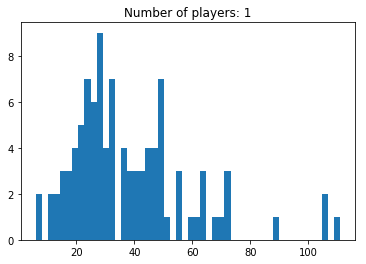

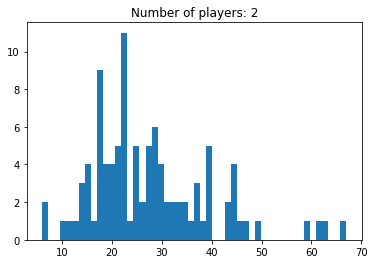

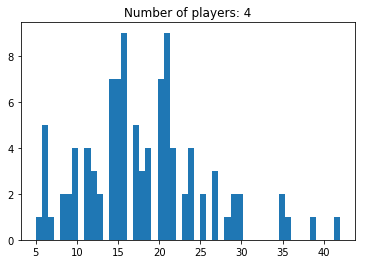

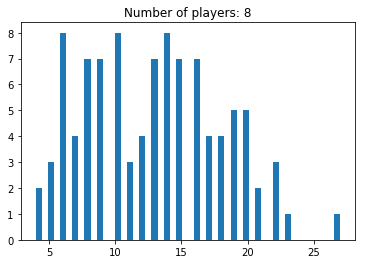

In [15]:
# -*- coding: utf-8 -*-

__author__ = 'Nina Mariann Vesseltun', 'Elin Woelner Bjoernson'
__email__ = 'nive@nmbu.no', 'elinbj@nmbu.no'


import random
import statistics
import matplotlib.pyplot as plt
import numpy as np

def chute_or_ladder(position):
    """
    Changes position if player landed on chute or ladder
    Parameters
    ----------
    position : int

    Returns
    -------
    new_position : int
        changes if player landed on chute or ladder

    """
    from_position = [1, 8, 36, 43, 49, 65, 68, 24, 33, 42, 56, 64, 74, 87]
    to_position = [40, 10, 52, 62, 79, 82, 85, 5, 3, 30, 37, 27, 12, 70]
    if position in from_position:
        new_position = to_position[from_position.index(position)]
        return new_position
    else:
        return position


def single_game(num_players):
    """
    Returns duration of single game.

    Arguments
    ---------
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : int
        Number of moves the winning player needed to reach the goal
    """
    player_position = []
    player_moves = []
    for i in range(num_players):
        player_position.append(0)  # everybody starts at position 0
        player_moves.append(0)  # starts with 0 moves
    play = True
    num_moves = 0
    while play is True:
        for player in range(num_players):
            dice = random.randint(1, 6)
            player_position[player] += dice
            player_moves[player] += 1
            player_position[player] = chute_or_ladder(player_position[player])
            if player_position[player] >= 90:
                num_moves = player_moves[player]
                play = False
    return num_moves


def multiple_games(num_games, num_players):
    """
    Returns durations of a number of games.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game

    Returns
    -------
    num_moves : list
        List with the number of moves needed in each game.
    """
    num_moves = []
    for i in range(num_games):
        num_moves.append(single_game(num_players))
    return num_moves


def multi_game_experiment(num_games, num_players, seed):
    """
    Returns durations of a number of games when playing with given seed.

    Arguments
    ---------
    num_games : int
        Number of games to play
    num_players : int
        Number of players in the game
    seed : int
        Seed used to initialise the random number generator

    Returns
    -------
    num_moves : list
        List with the number of moves needed in each game.
    """
    num_moves = []
    random.seed(seed)
    for i in range(num_games):
        num_moves.append(single_game(num_players))
    return num_moves


if __name__ == '__main__':    
    for num_players in [1, 2, 4, 8]:
        duration = multi_game_experiment(100, num_players, 6)
        a = np.asarray(duration)
        plt.hist(x = a, bins = 50)
        plt.title(f'Number of players: {num_players}')
        plt.show()    
